In [2]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes classifier from the Scikit-Learn library
from sklearn.model_selection import train_test_split #imports the train_test_split function from Scikit-Learn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df = pd.read_csv("/Users/ommukundushir/mllab_62/assignment_4/DoctorAUS.csv")
df

,sex,age,income,insurance,illness,actdays,hscore,chcond,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
0,1,0.19,0.55,levyplus,1,4,1,np,1,0,0,0,1,1,0
1,1,0.19,0.45,levyplus,1,2,1,np,1,0,0,0,2,1,1
2,0,0.19,0.90,medlevy,3,0,0,np,1,0,1,4,2,1,1
3,0,0.19,0.15,medlevy,1,0,0,np,1,0,0,0,0,0,0
4,0,0.19,0.45,medlevy,2,5,1,la,1,0,0,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,1,0.22,0.55,medlevy,0,0,0,np,0,0,0,0,0,0,0
5186,0,0.27,1.30,medlevy,0,0,1,np,0,0,0,0,3,0,3
5187,1,0.37,0.25,freerepa,1,0,1,np,0,0,0,0,0,0,0
5188,1,0.52,0.65,medlevy,0,0,0,np,0,0,0,0,0,0,0


In [8]:
df.isnull().sum()


sex          0
age          0
income       0
insurance    0
illness      0
actdays      0
hscore       0
chcond       0
doctorco     0
nondocco     0
hospadmi     0
hospdays     0
medecine     0
prescrib     0
nonpresc     0
dtype: int64

In [11]:
X = df[['age', 'income', 'sex', 'illness', 'actdays', 'hscore', 'doctorco', 'nondocco', 'hospadmi', 'hospdays', 'medecine', 'prescrib']]
y = df['insurance']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
clf = GaussianNB()

In [18]:
clf.fit(X_train, y_train)

GaussianNB()

In [20]:
clf.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
# Evaluate the model's performance using a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     freepor       0.29      0.12      0.16        69
    freerepa       0.63      0.52      0.57       321
    levyplus       0.50      0.31      0.39       670
     medlevy       0.48      0.81      0.60       497

    accuracy                           0.51      1557
   macro avg       0.47      0.44      0.43      1557
weighted avg       0.51      0.51      0.48      1557



In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/Users/ommukundushir/mllab_62/assignment_4/DoctorAUS.csv")

In [29]:
data.dtypes

sex            int64
age          float64
income       float64
insurance     object
illness        int64
actdays        int64
hscore         int64
chcond        object
doctorco       int64
nondocco       int64
hospadmi       int64
hospdays       int64
medecine       int64
prescrib       int64
nonpresc       int64
dtype: object

In [31]:
data.describe

<bound method NDFrame.describe of       sex   age  income insurance  illness  actdays  hscore chcond  doctorco  \
0       1  0.19    0.55  levyplus        1        4       1     np         1   
1       1  0.19    0.45  levyplus        1        2       1     np         1   
2       0  0.19    0.90   medlevy        3        0       0     np         1   
3       0  0.19    0.15   medlevy        1        0       0     np         1   
4       0  0.19    0.45   medlevy        2        5       1     la         1   
...   ...   ...     ...       ...      ...      ...     ...    ...       ...   
5185    1  0.22    0.55   medlevy        0        0       0     np         0   
5186    0  0.27    1.30   medlevy        0        0       1     np         0   
5187    1  0.37    0.25  freerepa        1        0       1     np         0   
5188    1  0.52    0.65   medlevy        0        0       0     np         0   
5189    0  0.72    0.25  freerepa        0        0       0     np         0   

     

In [ ]:
# Group data by insurance type
grouped_data = data.groupby("insurance")

# 1. Number of individuals with each insurance type

# Count the number of individuals in each group
n_individuals_per_insurance = grouped_data.size()

# Print the results
print("Number of individuals with each insurance type:")
print(n_individuals_per_insurance)

# 2. Average age for each insurance type

# Calculate the average age for each group
avg_age_per_insurance = grouped_data["age"].mean()

# Print the results
print("\nAverage age for each insurance type:")
print(avg_age_per_insurance)

Number of individuals with each insurance type:
insurance
freepor      222
freerepa    1091
levyplus    2298
medlevy     1579
dtype: int64

Average age for each insurance type:
insurance
freepor     0.249910
freerepa    0.646434
levyplus    0.393268
medlevy     0.281615
Name: age, dtype: float64


In [1]:
# Bar chart for number of individuals
plt.figure(figsize=(8, 6))
n_individuals_per_insurance.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Insurance Type")
plt.ylabel("Number of Individuals")
plt.title("Number of Individuals by Insurance Type")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Box plot for age distribution
sns.boxplot(
    x = "insurance",
    y = "age",
    showmeans=True,
    data=df
)
plt.title("Age Distribution Across Insurance Types")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

NameError: name 'plt' is not defined

In [2]:
# Create a scatter plot for age vs. income

plt.figure(figsize=(8, 6))
plt.scatter(df["age"], df["income"], color="blue", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Income (in tens of thousands of dollars)")
plt.title("Relationship Between Age and Income")
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

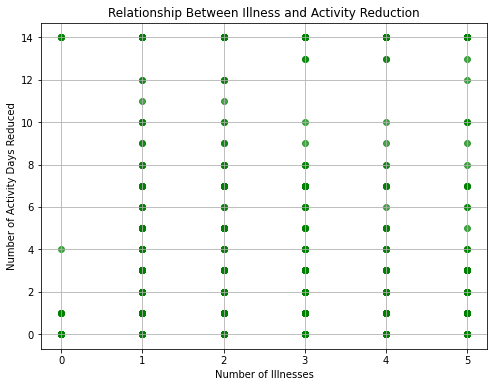

In [39]:
# Create a scatter plot for illness vs. actdays (replace as needed)
plt.figure(figsize=(8, 6))
plt.scatter(df["illness"], df["actdays"], color="green", alpha=0.7)
plt.xlabel("Number of Illnesses")
plt.ylabel("Number of Activity Days Reduced")
plt.title("Relationship Between Illness and Activity Reduction")
plt.grid(True)
plt.show()

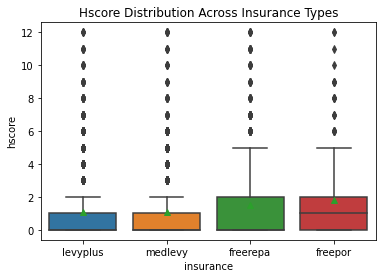

In [41]:
# Create a box plot for hscore distribution across insurance types
sns.boxplot(
    x = "insurance",
    y = "hscore",
    showmeans=True,
    data=df
)
plt.title("Hscore Distribution Across Insurance Types")
plt.show()

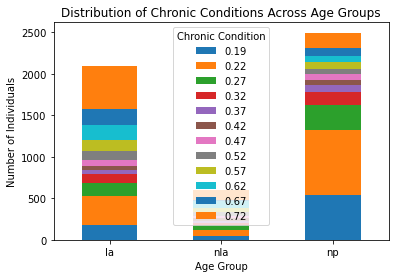

In [43]:
 #1. Chronic conditions (chcond) distribution across age groups

# Create a cross-tabulation table
chcond_age_counts = pd.crosstab(df["chcond"], df["age"])

# Visualize the distribution using a bar chart
chcond_age_counts.plot(kind="bar", stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Chronic Conditions Across Age Groups")
plt.legend(title="Chronic Condition")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [45]:
# 3. Proportion of population using non-prescribed medications (nonpresc)

# Calculate the proportion
prop_nonpresc_users = data["nonpresc"].sum() / len(df)

# Print the proportion
print(f"Proportion of population using non-prescribed medications: {prop_nonpresc_users:.2%}")

Proportion of population using non-prescribed medications: 35.57%


In [46]:
# 3. Proportion of population using non-prescribed medications (nonpresc)

# Calculate the proportion
prop_nonpresc_users = df["doctorco"].sum() / len(df)

# Print the proportion
print(f"Proportion of population using non-prescribed medications: {prop_nonpresc_users:.2%}")

Proportion of population using non-prescribed medications: 30.17%
